In [ ]:
!pip install opendatasets

In [ ]:
## Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import opendatasets as od

In [ ]:
!pip install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: imakumarasinghe
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset


100%|██████████| 1.25G/1.25G [00:09<00:00, 145MB/s]


In [ ]:
import os

base_path = "/content"
for root, dirs, files in os.walk(base_path, topdown=True):
    if "Train" in dirs or "Dataset" in dirs:
        print(root, dirs)


/content/plant-disease-recognition-dataset ['Test', 'Validation', 'Train']
/content/plant-disease-recognition-dataset/Train ['Train']


In [ ]:
DATA_ROOT = "/content/plant-disease-recognition-dataset/Dataset"


In [ ]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

# Construct full paths using previously defined directory variables
train_files_healthy = os.path.join(train_dir, "Train", "Healthy")
train_files_powdery = os.path.join(train_dir, "Train", "Powdery")
train_files_rust = os.path.join(train_dir, "Train", "Rust")

test_files_healthy = os.path.join(test_dir, "Test", "Healthy")
test_files_powdery = os.path.join(test_dir, "Test", "Powdery")
test_files_rust = os.path.join(test_dir, "Test", "Rust")

valid_files_healthy = os.path.join(val_dir, "Validation", "Healthy")
valid_files_powdery = os.path.join(val_dir, "Validation", "Powdery")
valid_files_rust = os.path.join(val_dir, "Validation", "Rust")

print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of powder leaf images in training set", total_files(train_files_powdery))
print("Number of rusty leaf images in training set", total_files(train_files_rust))

print("========================================================")

print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of powder leaf images in test set", total_files(test_files_powdery))
print("Number of rusty leaf images in test set", total_files(test_files_rust))
print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of powder leaf images in validation set", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set", total_files(valid_files_rust))

Number of healthy leaf images in training set 458
Number of powder leaf images in training set 430
Number of rusty leaf images in training set 434
Number of healthy leaf images in test set 50
Number of powder leaf images in test set 50
Number of rusty leaf images in test set 50
Number of healthy leaf images in validation set 20
Number of powder leaf images in validation set 20
Number of rusty leaf images in validation set 20


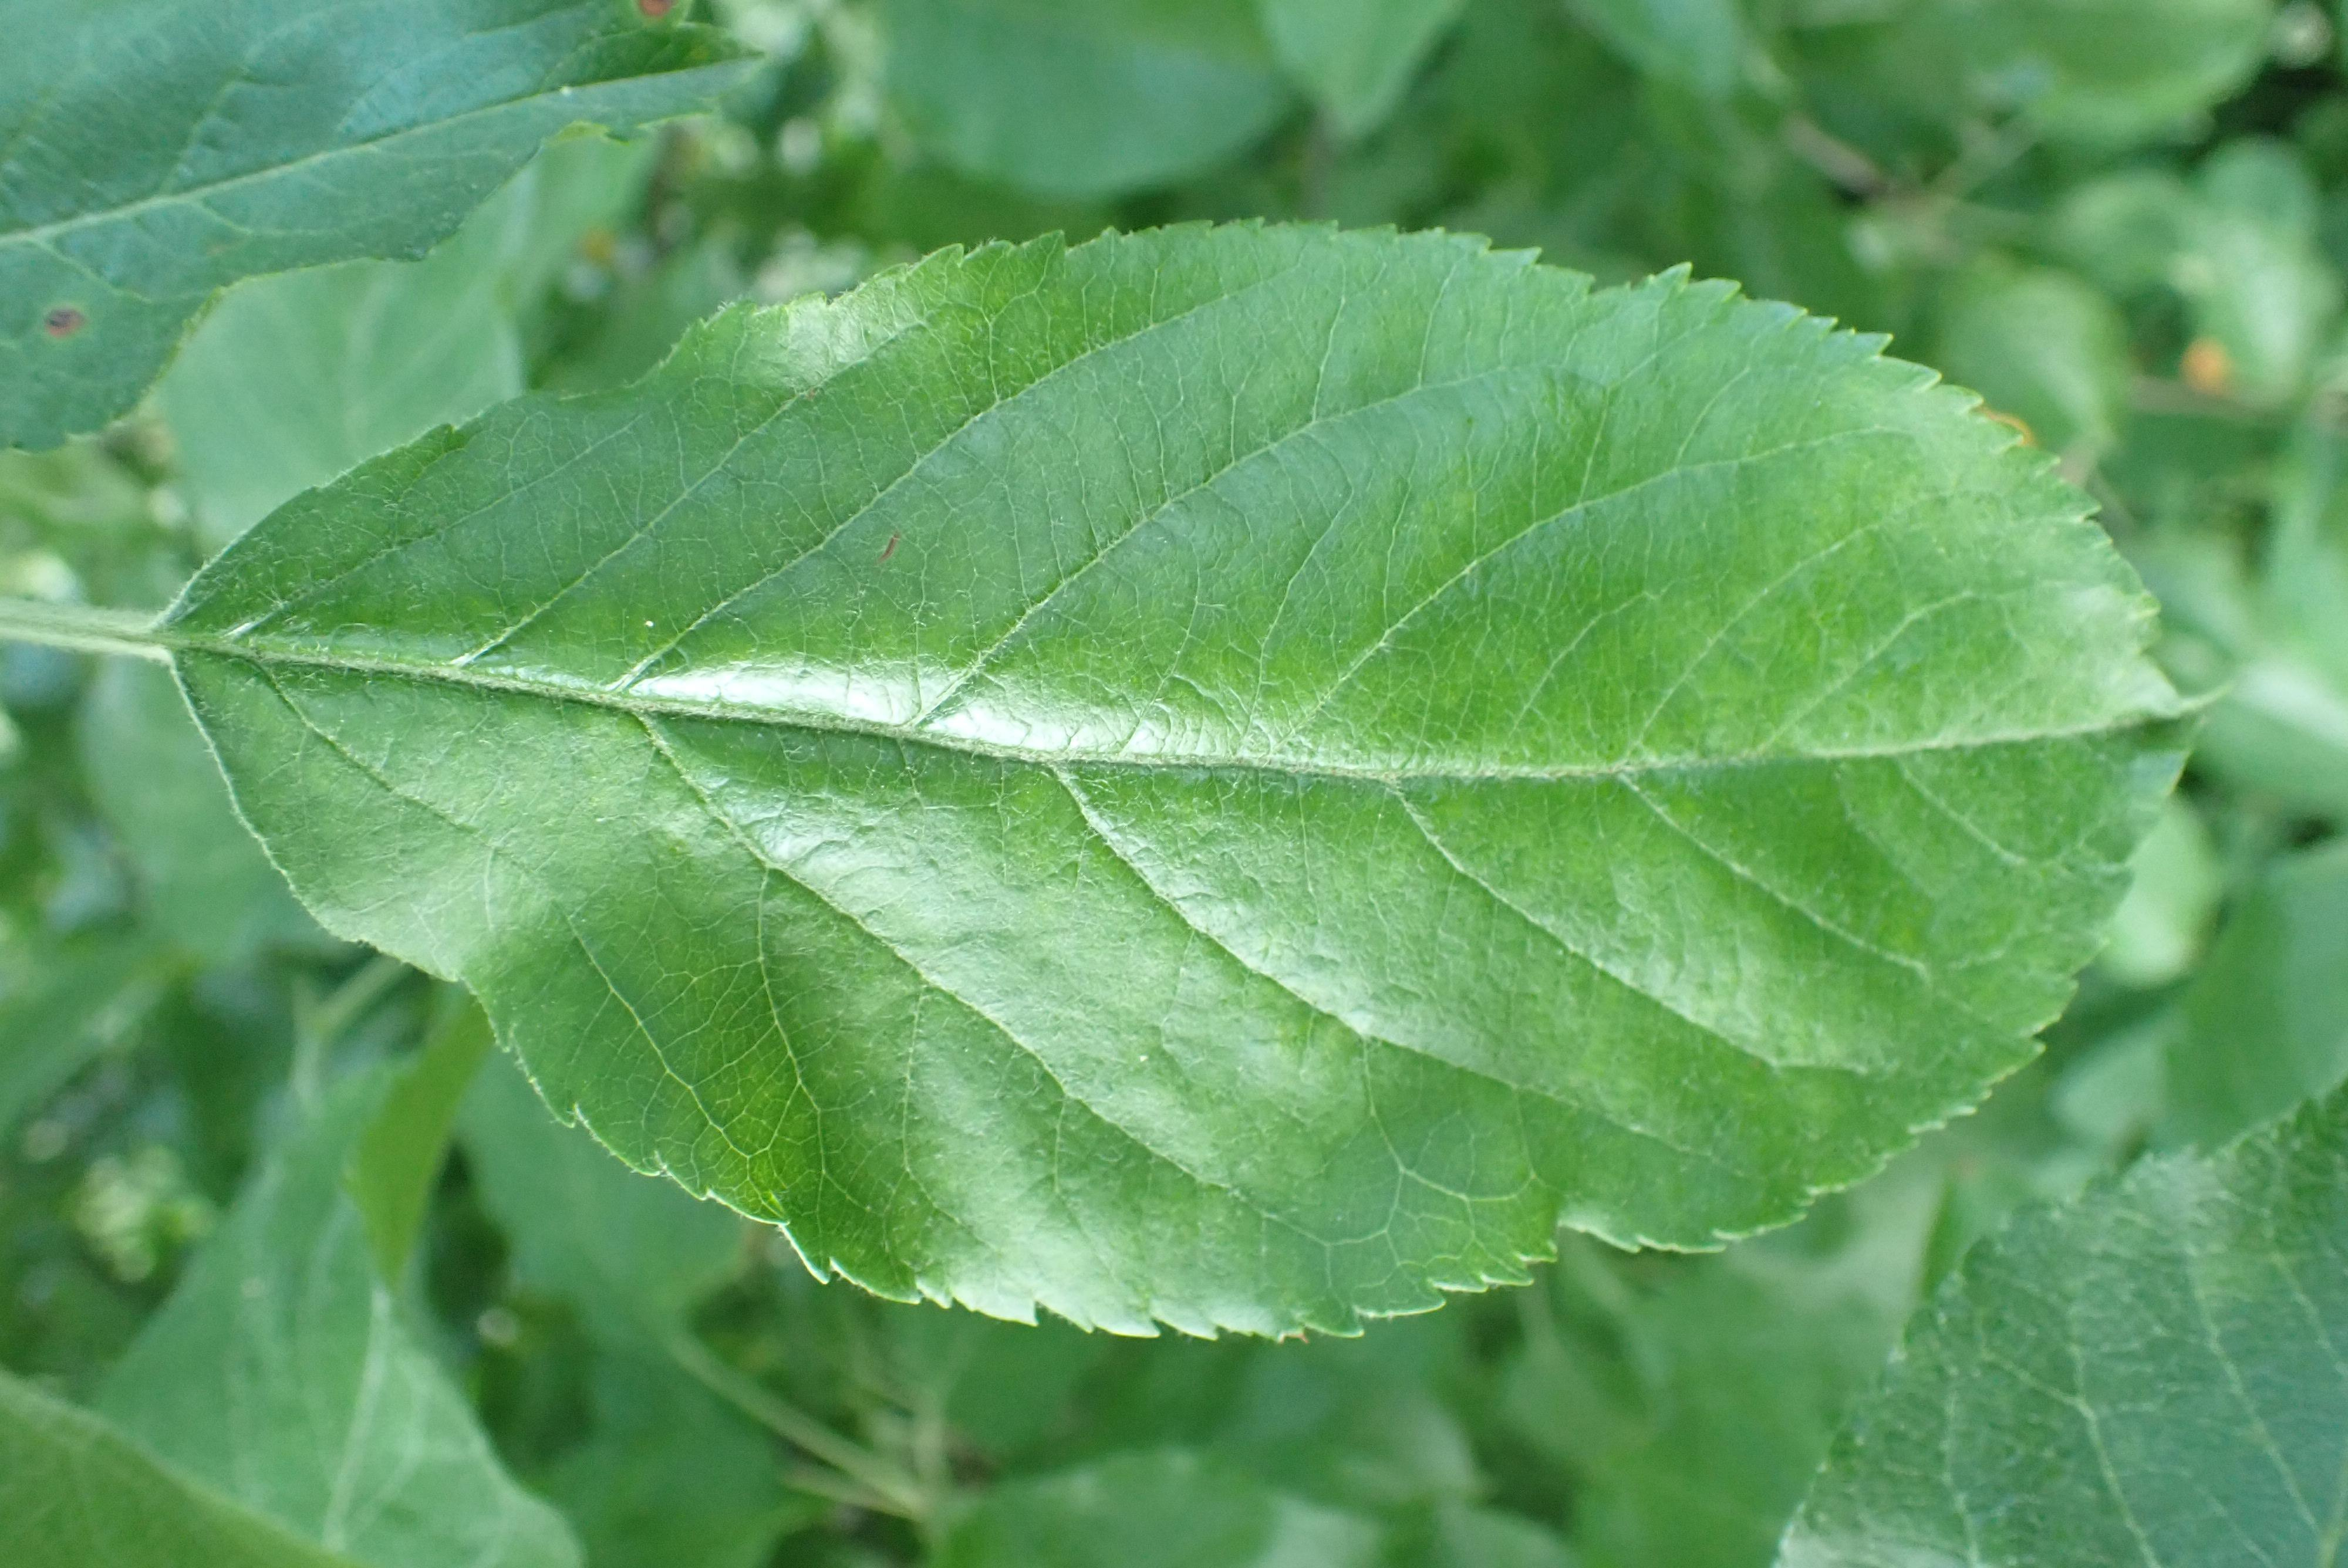

In [ ]:
from PIL import Image
import IPython.display as display
import os

# Construct the image path using the correct directory variable
image_file_name = '8ce77048e12f3dd4.jpg'
image_path = os.path.join(train_files_healthy, image_file_name)

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

Displaying image: fc3c93c923967303.jpg


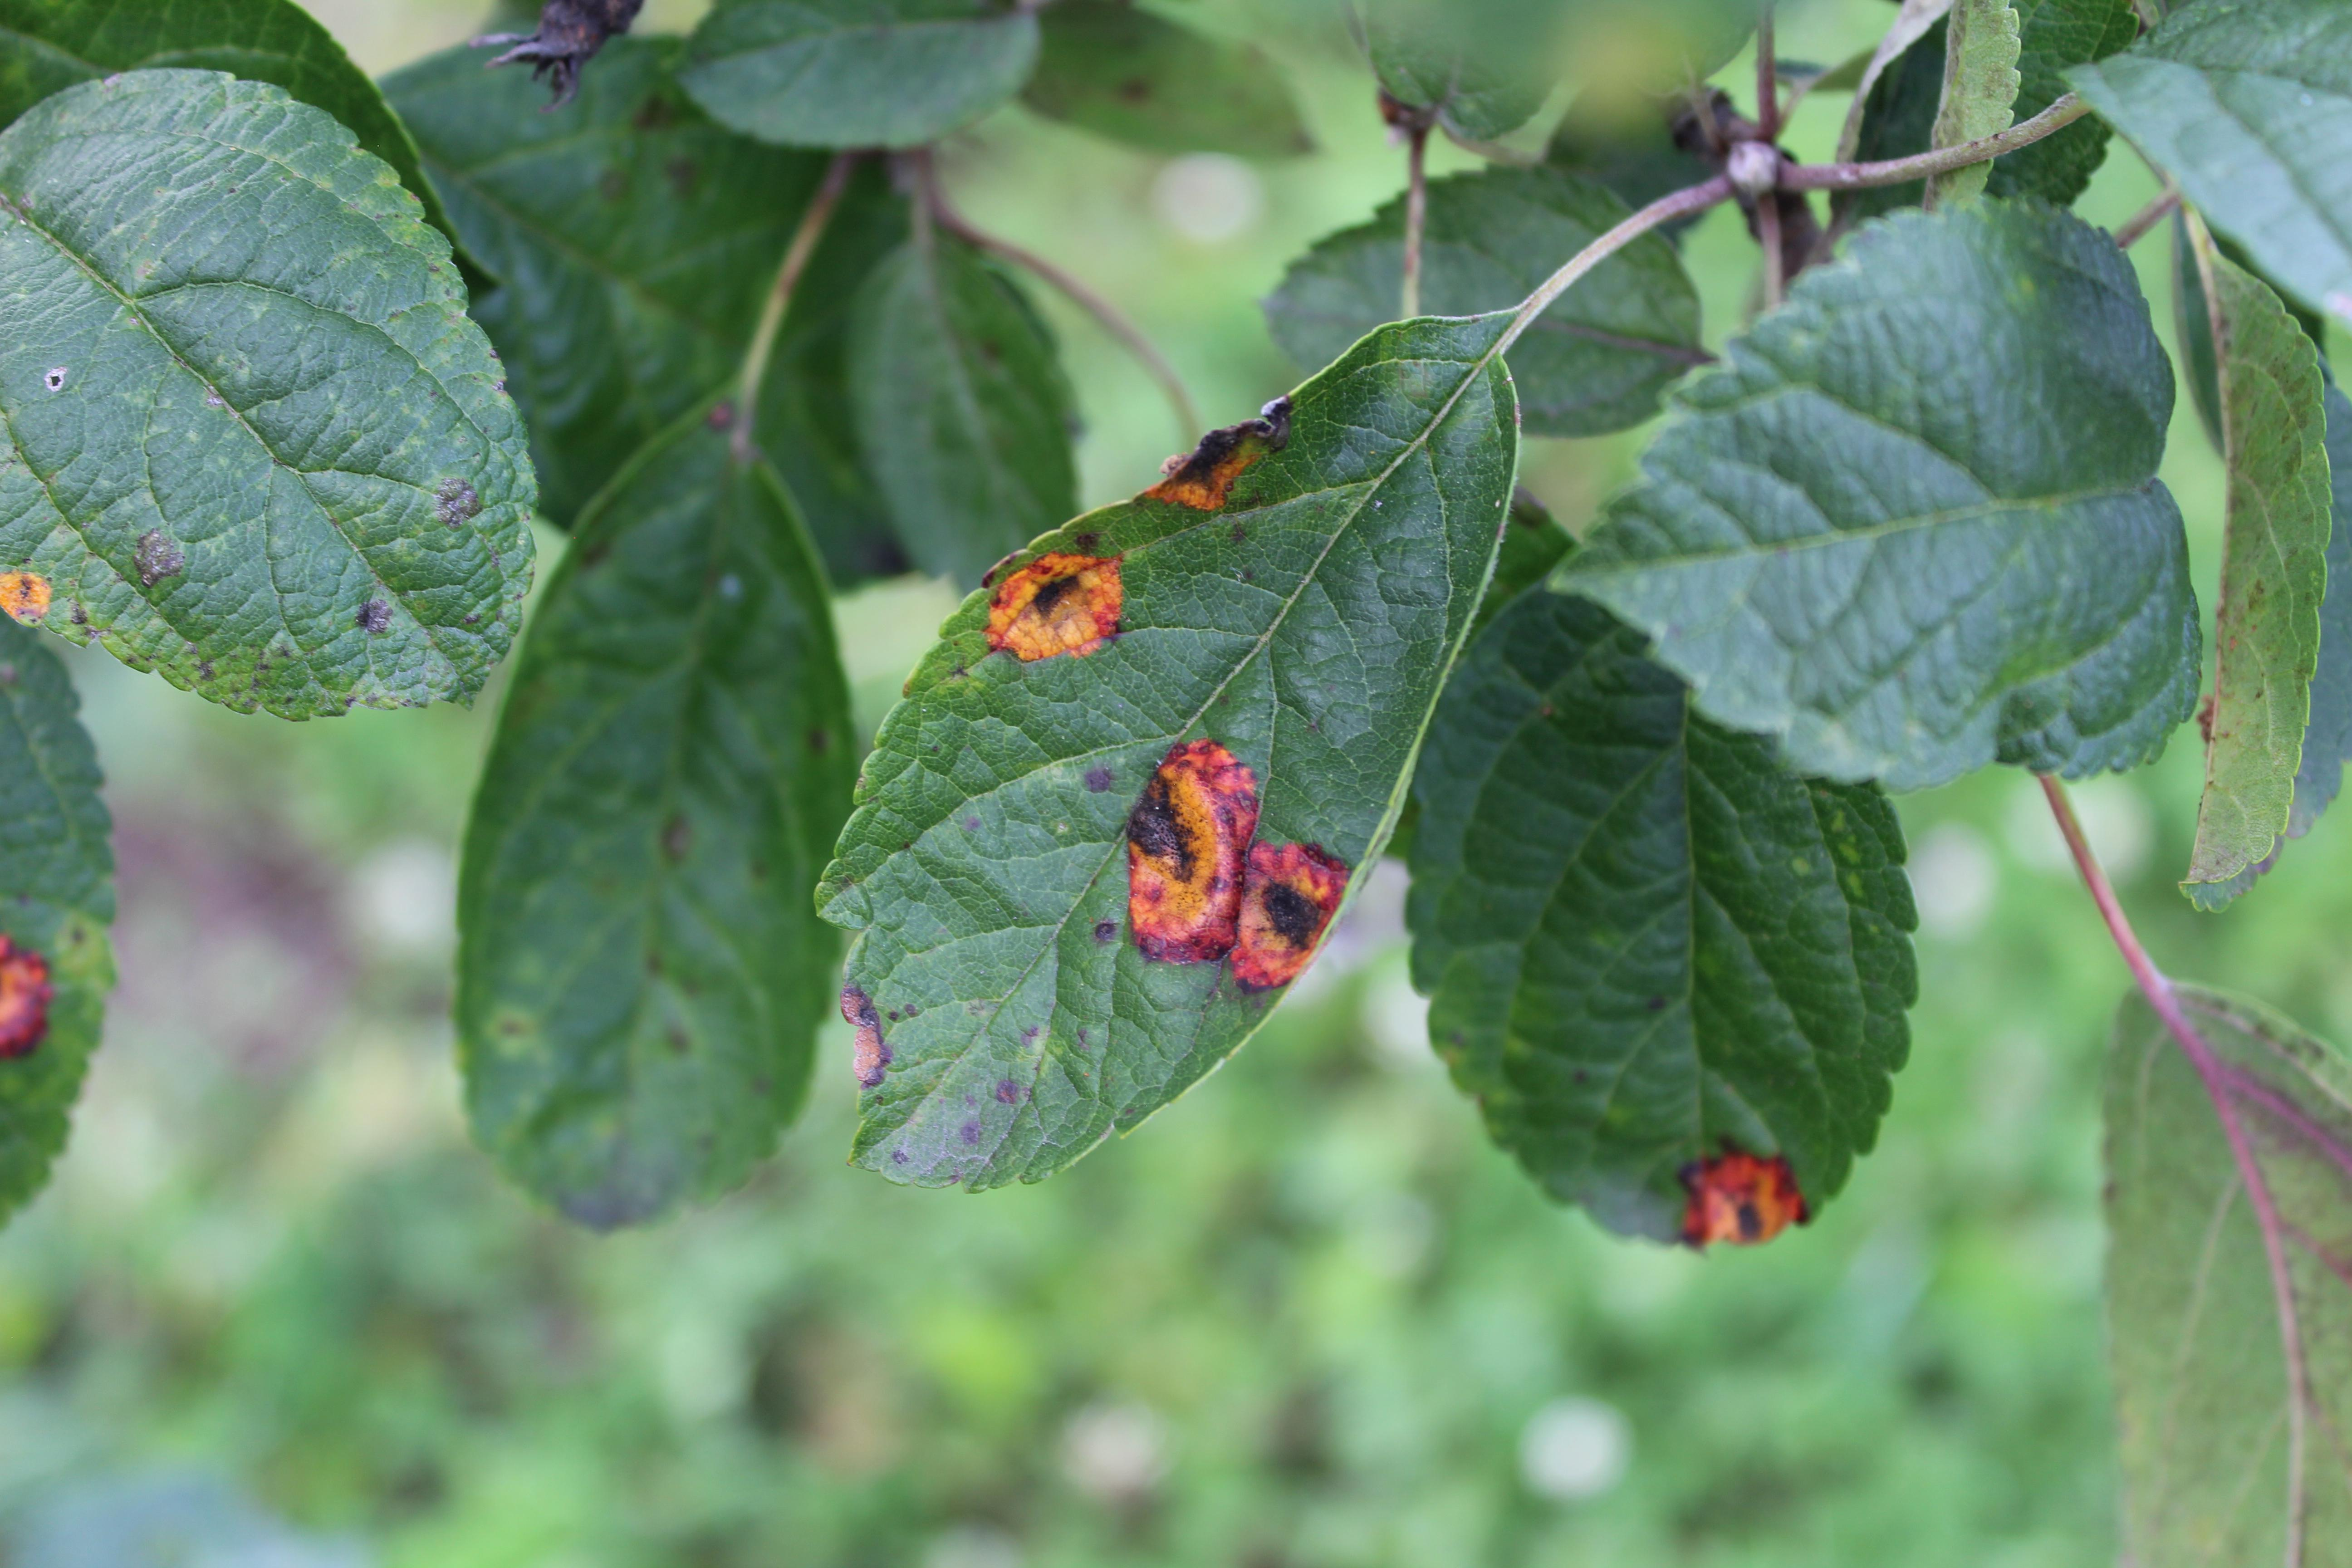

In [ ]:
from PIL import Image
import IPython.display as display
import os

# List all files in the rust training directory
rust_files = [f for f in os.listdir(train_files_rust) if os.path.isfile(os.path.join(train_files_rust, f))]

# Check if there are any files
if rust_files:
    image_file_name = rust_files[0] # Take the first file found
    image_path = os.path.join(train_files_rust, image_file_name)

    print(f"Displaying image: {image_file_name}")
    with open(image_path, 'rb') as f:
        display.display(display.Image(data=f.read(), width=500))
else:
    print(f"No image files found in {train_files_rust}")

create new images using existing limited images

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
import os

train_data_path = os.path.join(train_dir, "Train")
validation_data_path = os.path.join(val_dir, "Validation")

train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_path,
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

train model

In [ ]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.3360 - loss: 2.9092 - val_accuracy: 0.5000 - val_loss: 1.3867
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.7027 - loss: 0.6998 - val_accuracy: 0.7333 - val_loss: 0.7102
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.8677 - loss: 0.3776 - val_accuracy: 0.7833 - val_loss: 0.5256
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9025 - loss: 0.2967 - val_accuracy: 0.8500 - val_loss: 0.4244
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.9242 - loss: 0.2166 - val_accuracy: 0.8667 - val_loss: 0.4396


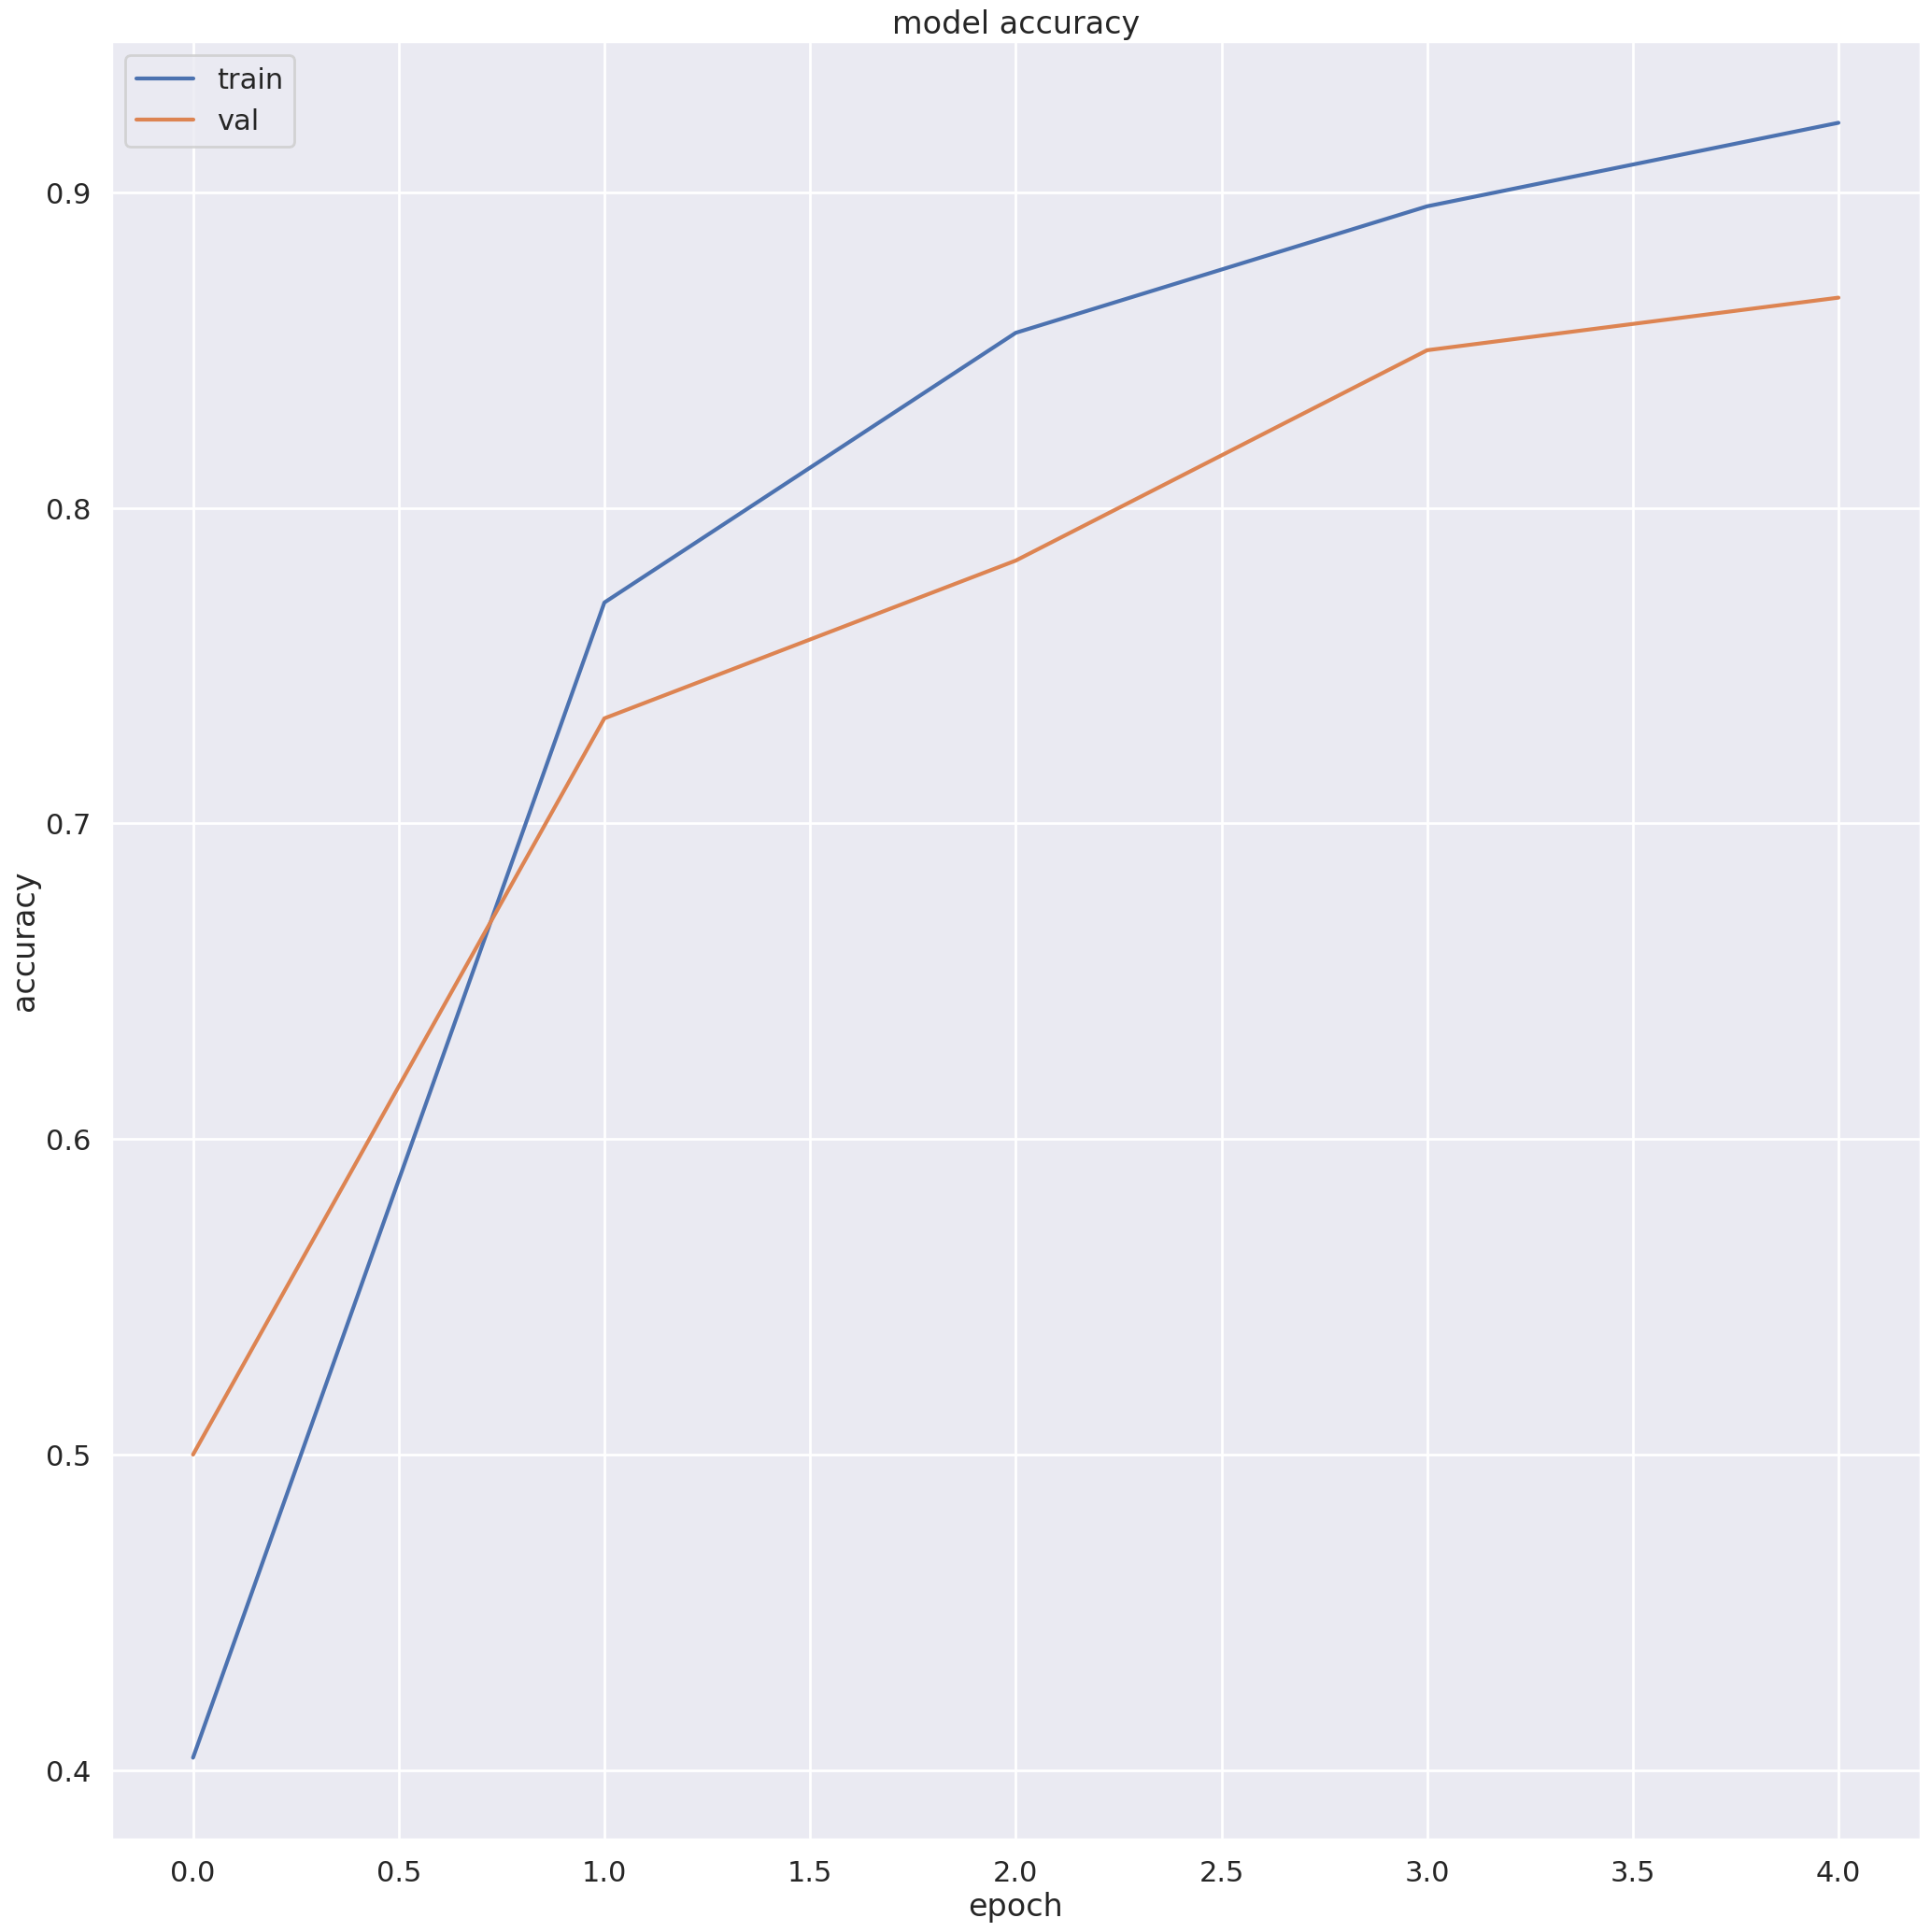

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save('plant_model.keras')


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('/content/plant-disease-recognition-dataset/Test/Test/Powdery/81f43097df3940d7.jpg')

In [ ]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([0.04059199, 0.9384477 , 0.02096026], dtype=float32)

In [ ]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [ ]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Powdery


In [ ]:
# train_generator.class_indices already present in Colab after flow_from_directory
labels = train_generator.class_indices  # ex: {'Healthy':0,'Powdery':1,'Rust':2}
# invert mapping for inference
inv_labels = {v:k for k,v in labels.items()}

import json
with open('labels.json', 'w') as f:
    json.dump(inv_labels, f)


In [ ]:
with open('model_readme.txt','w') as f:
    f.write("input_size=225\nnormalize=1/255\nclasses: " + str(inv_labels))


In [ ]:
from google.colab import files
files.download('plant_model.keras')
files.download('labels.json')
files.download('model_readme.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>